## Load Dataset

In [44]:
import pandas as pd

data = pd.read_csv('/content/Sentiment_Analysis_Dataset.csv')
data.head()

,Unnamed: 0,statement,status
0,0,oh my gosh,Anxiety
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,3,I've shifted my focus to something else but I'...,Anxiety
4,4,"I'm restless and restless, it's been a month n...",Anxiety


## Data Cleaning


In [45]:
print('Missing values per column:')
print(data.isnull().sum())

print('\nNumber of duplicate rows:')
print(data.duplicated().sum())

Missing values per column:
Unnamed: 0      0
statement     362
status          0
dtype: int64

Number of duplicate rows:
0


In [46]:
data = data.drop('Unnamed: 0', axis=1)
print('Data types after dropping "Unnamed: 0" column:')
print(data.dtypes)

Data types after dropping "Unnamed: 0" column:
statement    object
status       object
dtype: object


In [47]:
data.dropna(subset=['statement'], inplace=True)
print('Shape of DataFrame after dropping missing values:')
print(data.shape)

Shape of DataFrame after dropping missing values:
(52681, 2)


## Exploratory Data Analysis (EDA)


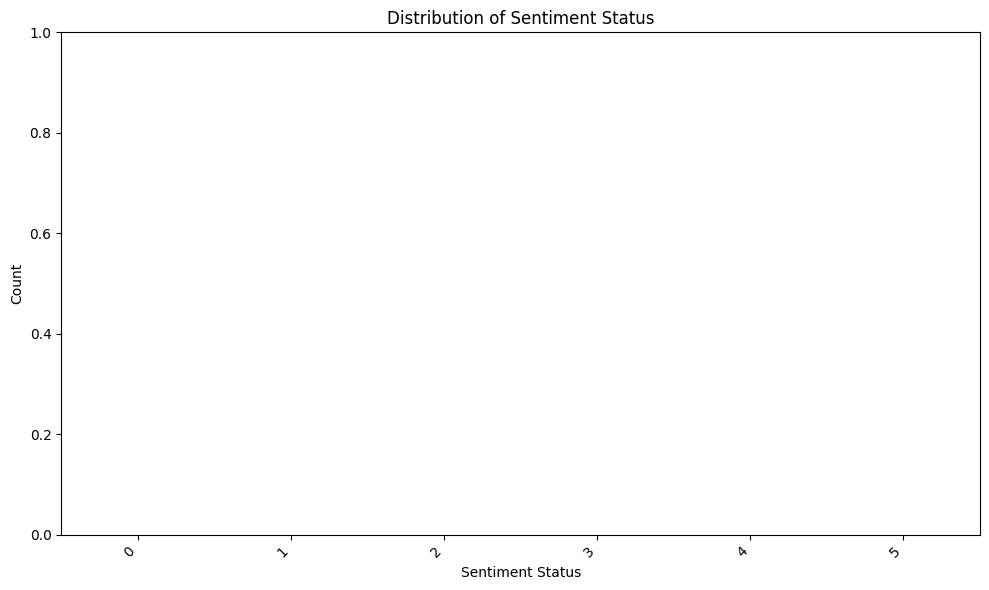

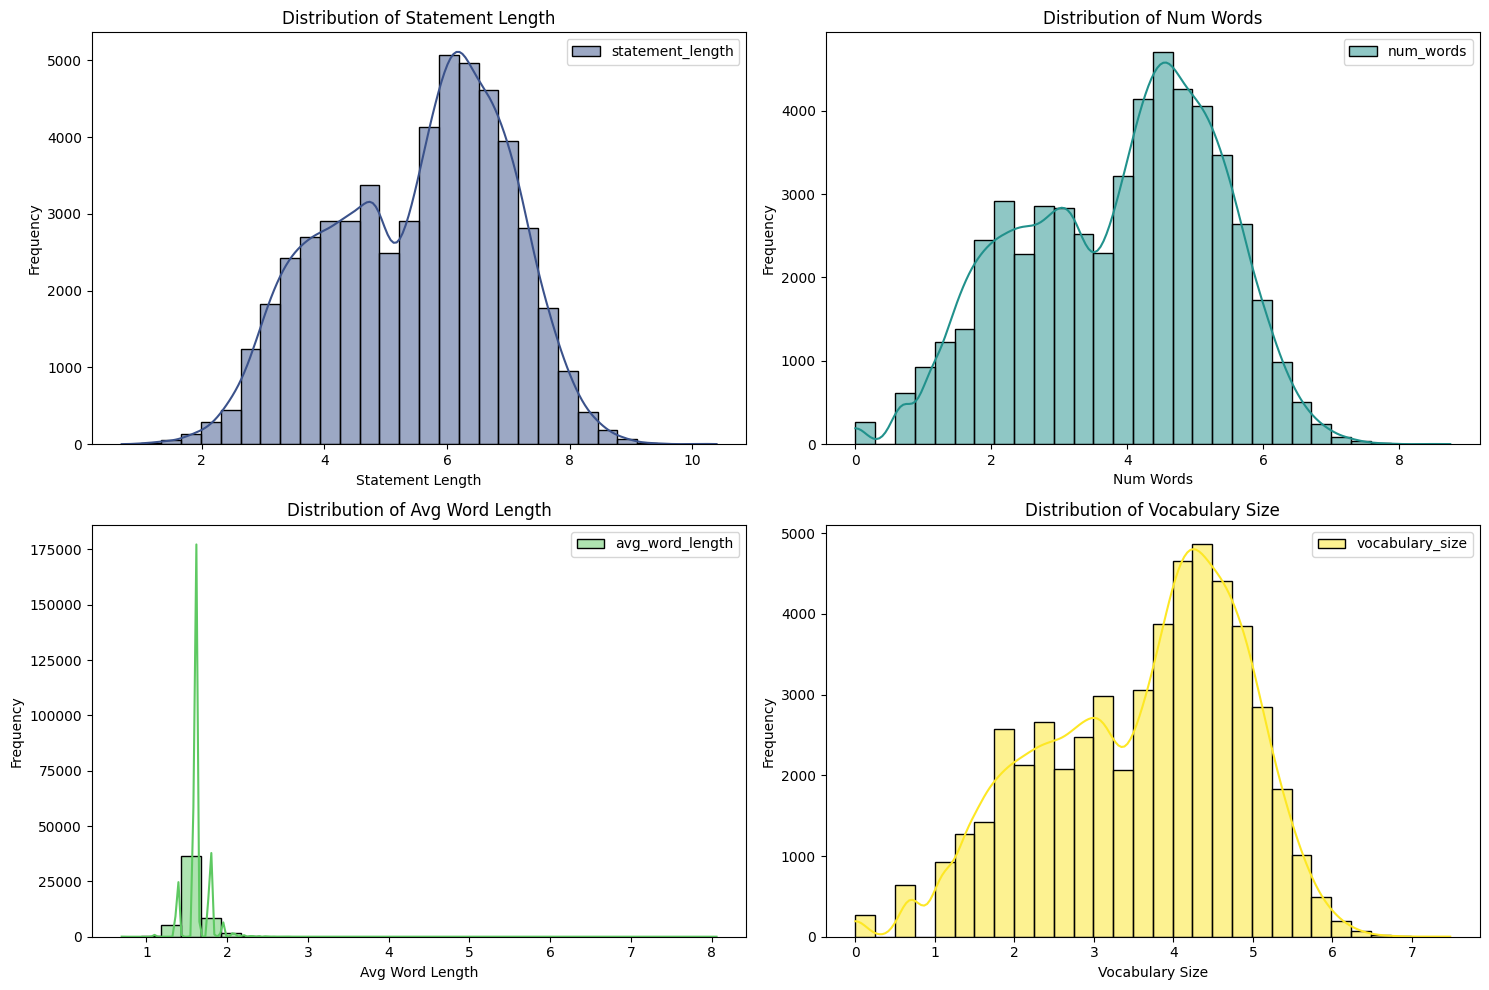

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Map numerical status to descriptive labels for better readability
df['status_label'] = df['status'].map(label_ordered)

# Visualize the distribution of the target variable ('status')
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='status_label', palette='viridis', hue='status_label', legend=False)
plt.title('Distribution of Sentiment Status')
plt.xlabel('Sentiment Status')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Visualize the distribution of numerical features using histograms
numerical_features = ['statement_length', 'num_words', 'avg_word_length', 'vocabulary_size']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[feature], kde=True, bins=30, color=plt.cm.viridis(i/len(numerical_features)), label=feature)
    plt.title(f'Distribution of {feature.replace("_", " ").title()}')
    plt.xlabel(feature.replace("_", " ").title())
    plt.ylabel('Frequency')
    plt.legend()
plt.tight_layout()
plt.show()

Descriptive Statistics for Numerical Features:
       statement_length     num_words  avg_word_length  vocabulary_size
count      52681.000000  52681.000000     52681.000000     52681.000000
mean           5.513731      3.876793         1.635091         3.610870
std            1.442290      1.450423         0.155706         1.254016
min            0.693147      0.000000         0.693147         0.000000
25%            4.382027      2.708050         1.609438         2.639057
50%            5.758902      4.127134         1.609438         3.871201
75%            6.622736      4.997212         1.609438         4.584967
max           10.396933      8.748305         8.059276         7.481556


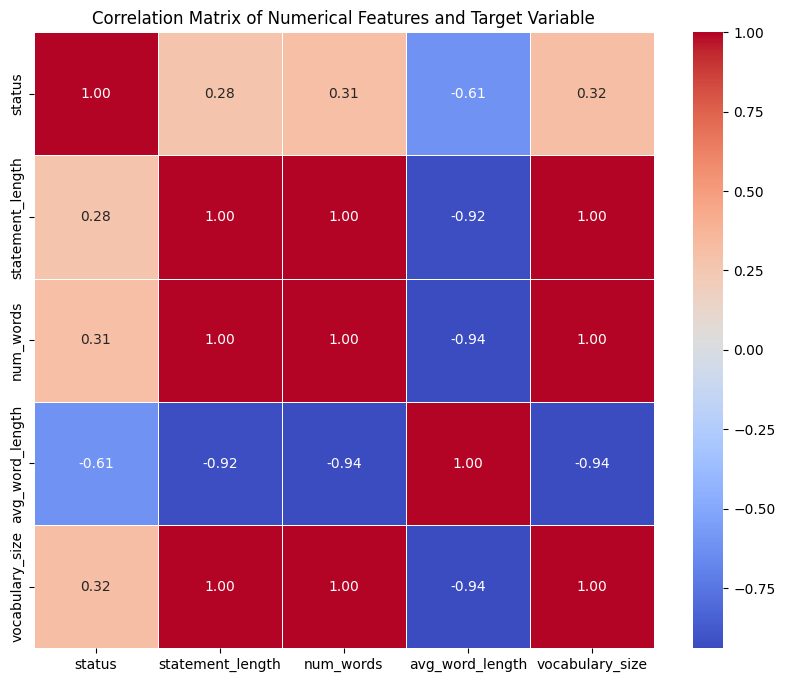

In [49]:
print('Descriptive Statistics for Numerical Features:')
print(df[numerical_features].describe())

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(Heatmap.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix of Numerical Features and Target Variable')
plt.show()

## Exploratory Data Analysis (EDA)

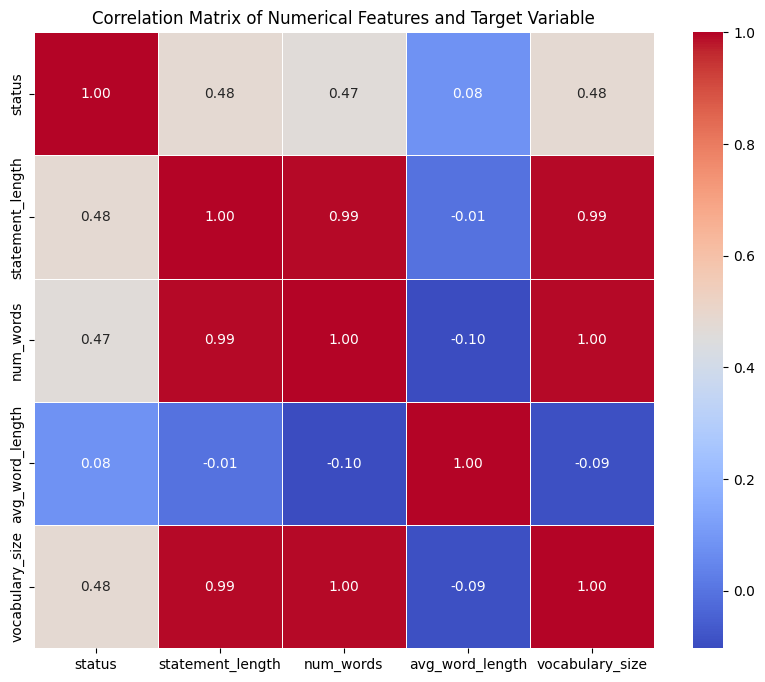

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(Heatmap, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix of Numerical Features and Target Variable')
plt.show()

## Data Pre-processing


In [51]:
import re

# 1. Convert the 'status' column to numerical representations
# Invert the label_ordered dictionary to map string labels to numerical values
label_to_numeric = {label: i for i, label in enumerate(label_ordered.keys())}
df['target'] = df['status'].map(label_to_numeric)

# 2. Clean the text in the 'statement' column
df['cleaned_statement'] = df['statement'].str.lower()
df['cleaned_statement'] = df['cleaned_statement'].apply(lambda x: re.sub(r'[^"\w\s\[\]+\-*\/<>%\._]', '', x))

print("First 5 rows of df with 'target' and 'cleaned_statement' columns:")
print(df[['statement', 'status', 'target', 'cleaned_statement']].head())

First 5 rows of df with 'target' and 'cleaned_statement' columns:
                                           statement  status  target  \
0                                         oh my gosh       3     NaN   
1  trouble sleeping, confused mind, restless hear...       3     NaN   
2  all wrong, back off dear, forward doubt. stay ...       3     NaN   
3  i've shifted my focus to something else but i'...       3     NaN   
4  i'm restless and restless, it's been a month n...       3     NaN   

                                   cleaned_statement  
0                                         oh my gosh  
1  trouble sleeping confused mind restless heart....  
2  all wrong back off dear forward doubt. stay in...  
3  ive shifted my focus to something else but im ...  
4  im restless and restless its been a month now ...  


In [52]:
import re
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import numpy as np

# 1. Convert the 'status' column to numerical representations
# The 'status' column in 'df' already contains numerical representations (0-6), so directly assign it to 'target'.
df['target'] = df['status']

# Instruction 2: Clean the text in the 'statement' column (already done in previous step, ensuring consistency)
# The 'cleaned_statement' column should already exist from the previous execution.
# This line is kept here for re-execution safety, but its effect might be minimal if already processed.
df['cleaned_statement'] = df['statement'].str.lower()
df['cleaned_statement'] = df['cleaned_statement'].apply(lambda x: re.sub(r'[^"\w\s\[\]+\-*\/<>%\._]', '', x))

print("First 5 rows of df with 'target' and 'cleaned_statement' columns after correction:")
print(df[['statement', 'status', 'target', 'cleaned_statement']].head())

# 3. Initialize a tokenizer and fit it on the `cleaned_statement` column
tokenizer = Tokenizer(num_words=None, oov_token="<unk>")
tokenizer.fit_on_texts(df['cleaned_statement'])
print(f"Vocabulary size: {len(tokenizer.word_index)}")

# 4. Convert the `cleaned_statement` text into sequences of integers
X_sequences = tokenizer.texts_to_sequences(df['cleaned_statement'])

# 5. Pad these sequences to a uniform length
sequence_lengths = [len(x) for x in X_sequences]
max_sequence_length = int(np.percentile(sequence_lengths, 90))

X_padded = pad_sequences(X_sequences, maxlen=max_sequence_length, padding='post')
print(f"Shape of X_padded: {X_padded.shape}")

# 6. Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(
    X_padded, df['target'], test_size=0.2, random_state=42, stratify=df['target']
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

print(f"Shape of X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Shape of X_val: {X_val.shape}, y_val: {y_val.shape}")
print(f"Shape of X_test: {X_test.shape}, y_test: {y_test.shape}")

First 5 rows of df with 'target' and 'cleaned_statement' columns after correction:
                                           statement  status  target  \
0                                         oh my gosh       3       3   
1  trouble sleeping, confused mind, restless hear...       3       3   
2  all wrong, back off dear, forward doubt. stay ...       3       3   
3  i've shifted my focus to something else but i'...       3       3   
4  i'm restless and restless, it's been a month n...       3       3   

                                   cleaned_statement  
0                                         oh my gosh  
1  trouble sleeping confused mind restless heart....  
2  all wrong back off dear forward doubt. stay in...  
3  ive shifted my focus to something else but im ...  
4  im restless and restless its been a month now ...  
Vocabulary size: 62985
Shape of X_padded: (52681, 280)
Shape of X_train: (42144, 280), y_train: (42144,)
Shape of X_val: (5268, 280), y_val: (5268,)
Shape

## Build and Train ML Model


In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense

# Get vocabulary size and number of classes from previous steps
vocabulary_size = len(tokenizer.word_index) + 1 # +1 for padding/OOV token
num_classes = len(label_ordered) # number of unique sentiment labels

# Define the model architecture
model = Sequential([
    Embedding(input_dim=vocabulary_size, output_dim=128, input_length=max_sequence_length),
    GlobalAveragePooling1D(),
    Dense(64, activation='relu'), # First Dense layer
    Dense(num_classes, activation='softmax') # Output Dense layer with softmax for multi-class classification
])

print("Model architecture defined.")
model.summary()

Model architecture defined.


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ ?                      │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [55]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# 3. Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 4. Define callbacks for training
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)

callbacks = [early_stopping, reduce_lr]

# 5. Train the model
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=64,
    validation_data=(X_val, y_val),
    callbacks=callbacks
)

print("Model training complete.")

Epoch 1/20
659/659 ━━━━━━━━━━━━━━━━━━━━ 52s 77ms/step - accuracy: 0.8475 - loss: 0.4301 - val_accuracy: 0.7891 - val_loss: 0.5623 - learning_rate: 0.0010
Epoch 2/20
659/659 ━━━━━━━━━━━━━━━━━━━━ 51s 78ms/step - accuracy: 0.8649 - loss: 0.3715 - val_accuracy: 0.8041 - val_loss: 0.5723 - learning_rate: 0.0010
Epoch 3/20
659/659 ━━━━━━━━━━━━━━━━━━━━ 50s 76ms/step - accuracy: 0.8779 - loss: 0.3429 - val_accuracy: 0.7766 - val_loss: 0.6485 - learning_rate: 0.0010
Epoch 4/20
659/659 ━━━━━━━━━━━━━━━━━━━━ 50s 75ms/step - accuracy: 0.8710 - loss: 0.3521 - val_accuracy: 0.7840 - val_loss: 0.5884 - learning_rate: 0.0010
Epoch 5/20
659/659 ━━━━━━━━━━━━━━━━━━━━ 50s 75ms/step - accuracy: 0.9055 - loss: 0.2683 - val_accuracy: 0.7992 - val_loss: 0.5528 - learning_rate: 2.0000e-04
Epoch 6/20
659/659 ━━━━━━━━━━━━━━━━━━━━ 50s 75ms/step - accuracy: 0.9094 - loss: 0.2626 - val_accuracy: 0.8049 - val_loss: 0.5525 - learning_rate: 2.0000e-04
Epoch 7/20
659/659 ━━━━━━━━━━━━━━━━━━━━ 50s 76ms/step - accuracy: 0.

In [58]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)

165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7967 - loss: 0.5678
Test Accuracy: 0.8016701340675354
